# Data Exploration
<br> Here, we will be answering the following questions:
1. What are the cafe rankings based on average rating?
2. How does a cafe get a good or bad rating?
3. How have relevant ratings changed across time?
4. Are people honest with their ratings?
5. How does a cafe get a better or worse sentiment?
6. What are the best and worst cafes in KL and Selangor are?

But before that, we have to import some modules and also the dataframe that we collected and pre-processed.

In [1]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import string
import seaborn as sns
import collections
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer

In [2]:
reviews_df = pd.read_excel("../2. Data Pre-processing/kl_selangor_cafe_reviews.xlsx")
reviews_df

rating                       cafe_name  number_of_images estimated_date  \
0         4                        6Yi Cafe                10     2024-01-07   
1         4                        6Yi Cafe                10     2023-12-07   
2         5                        6Yi Cafe                 2     2023-12-07   
3         5                        6Yi Cafe                19     2023-06-07   
4         4                        6Yi Cafe                 2     2023-09-07   
..      ...                             ...               ...            ...   
675       4  半刻 Ban Ke Cafe @ Happy Mansion                 3     2024-05-07   
676       4  半刻 Ban Ke Cafe @ Happy Mansion                 6     2024-02-07   
677       5  半刻 Ban Ke Cafe @ Happy Mansion                 3     2024-01-07   
678       4  半刻 Ban Ke Cafe @ Happy Mansion                 1     2024-04-07   
679       5  半刻 Ban Ke Cafe @ Happy Mansion                 4     2023-12-07   

                                 description_processed  
0    nice quite friendly cafe food like homely meal...  
1    nice quiet place coffee cake lunch design retr...  
2    rare simple cosy cafe open till 12am considere...  
3    kindhearted cafe owner lot street abandoned an...  
4    cosy environment lot quality books free read o...  
..                                                 ...  
675  small cafe tucked away popular section 17 happ...  
676  love place especially upstairs little kitchen ...  
677  saw cafe xhs decided try overall good didnt re...  
678  time nice ambience friendly staffs fantastic f...  
679  try highly recommended 1st try ordering grab s...  

[680 rows x 5 columns]

## 1. What are the cafe rankings based on average rating?
* To answer this question, we have to group the reviews based on their cafe name
* Then we create a visual to show the cafe rankings

In [3]:
# Group by 'cafe_name' and perform the required aggregations
grouped_df = reviews_df.groupby('cafe_name').agg({
    # Get the number of ratings,
    'description_processed': 'count',
    # Get the average rating score,
    'rating': 'mean',
    # Get the total number of images 
    'number_of_images': 'sum',
    # Get the max and min date
    'estimated_date': ['min', 'max']
}).reset_index()
grouped_df

# Flatten the MultiIndex columns resulting from aggregation so that the max and min dates appear as separate columns
grouped_df.columns = ['cafe_name', 'number_of_ratings','average_rating','total_number_of_images', 'earliest_date', 'latest_date']

grouped_df

cafe_name  number_of_ratings  average_rating  \
0                          6Yi Cafe                  8           4.375   
1             ALLO by The Owls Cafe                  8           3.875   
2                          AMP Cafe                  8           4.500   
3                    ANT Cafe & Bar                  8           4.125   
4               AOOO Melbourne Cafe                  8           4.875   
..                              ...                ...             ...   
80  Yeah Man @ Wanderous Sheep Cafe                  8           4.375   
81                      Yu.Mee cafe                  8           3.500   
82   bröom Artisan Bakery & Kitchen                  8           3.375   
83   半刻 Ban Ke Cafe @ Happy Mansion                  8           4.500   
84              好家婆 Best Ah Ma Cafe                  8           4.750   

    total_number_of_images earliest_date latest_date  
0                       60    2023-06-07  2024-05-10  
1                       34    2023-11-07  2024-05-31  
2                       47    2024-01-07  2024-05-24  
3                       42    2020-06-07  2024-06-02  
4                       47    2024-01-07  2024-05-07  
..                     ...           ...         ...  
80                      24    2023-06-07  2024-05-24  
81                      18    2023-06-07  2024-05-31  
82                      53    2024-02-07  2024-05-31  
83                      57    2023-12-07  2024-05-24  
84                      46    2024-03-07  2024-05-31  

[85 rows x 6 columns]

Remember that our cafe name contains Chinese characters!
* As you can see, I have downloaded the Noto Sans SC font to support Chinese characters and added it to the matplotlib fonts folder
* Follow this link to see how to add support for Chinese characters for plots
<br>https://github.com/ultralytics/ultralytics/issues/5803

In [4]:
import matplotlib.font_manager
[f for f in matplotlib.font_manager.fontManager.ttflist if 'Noto Sans SC' in f.name]

[FontEntry(fname='c:\\Python312\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\NotoSansSC-Regular.ttf', name='Noto Sans SC', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')]

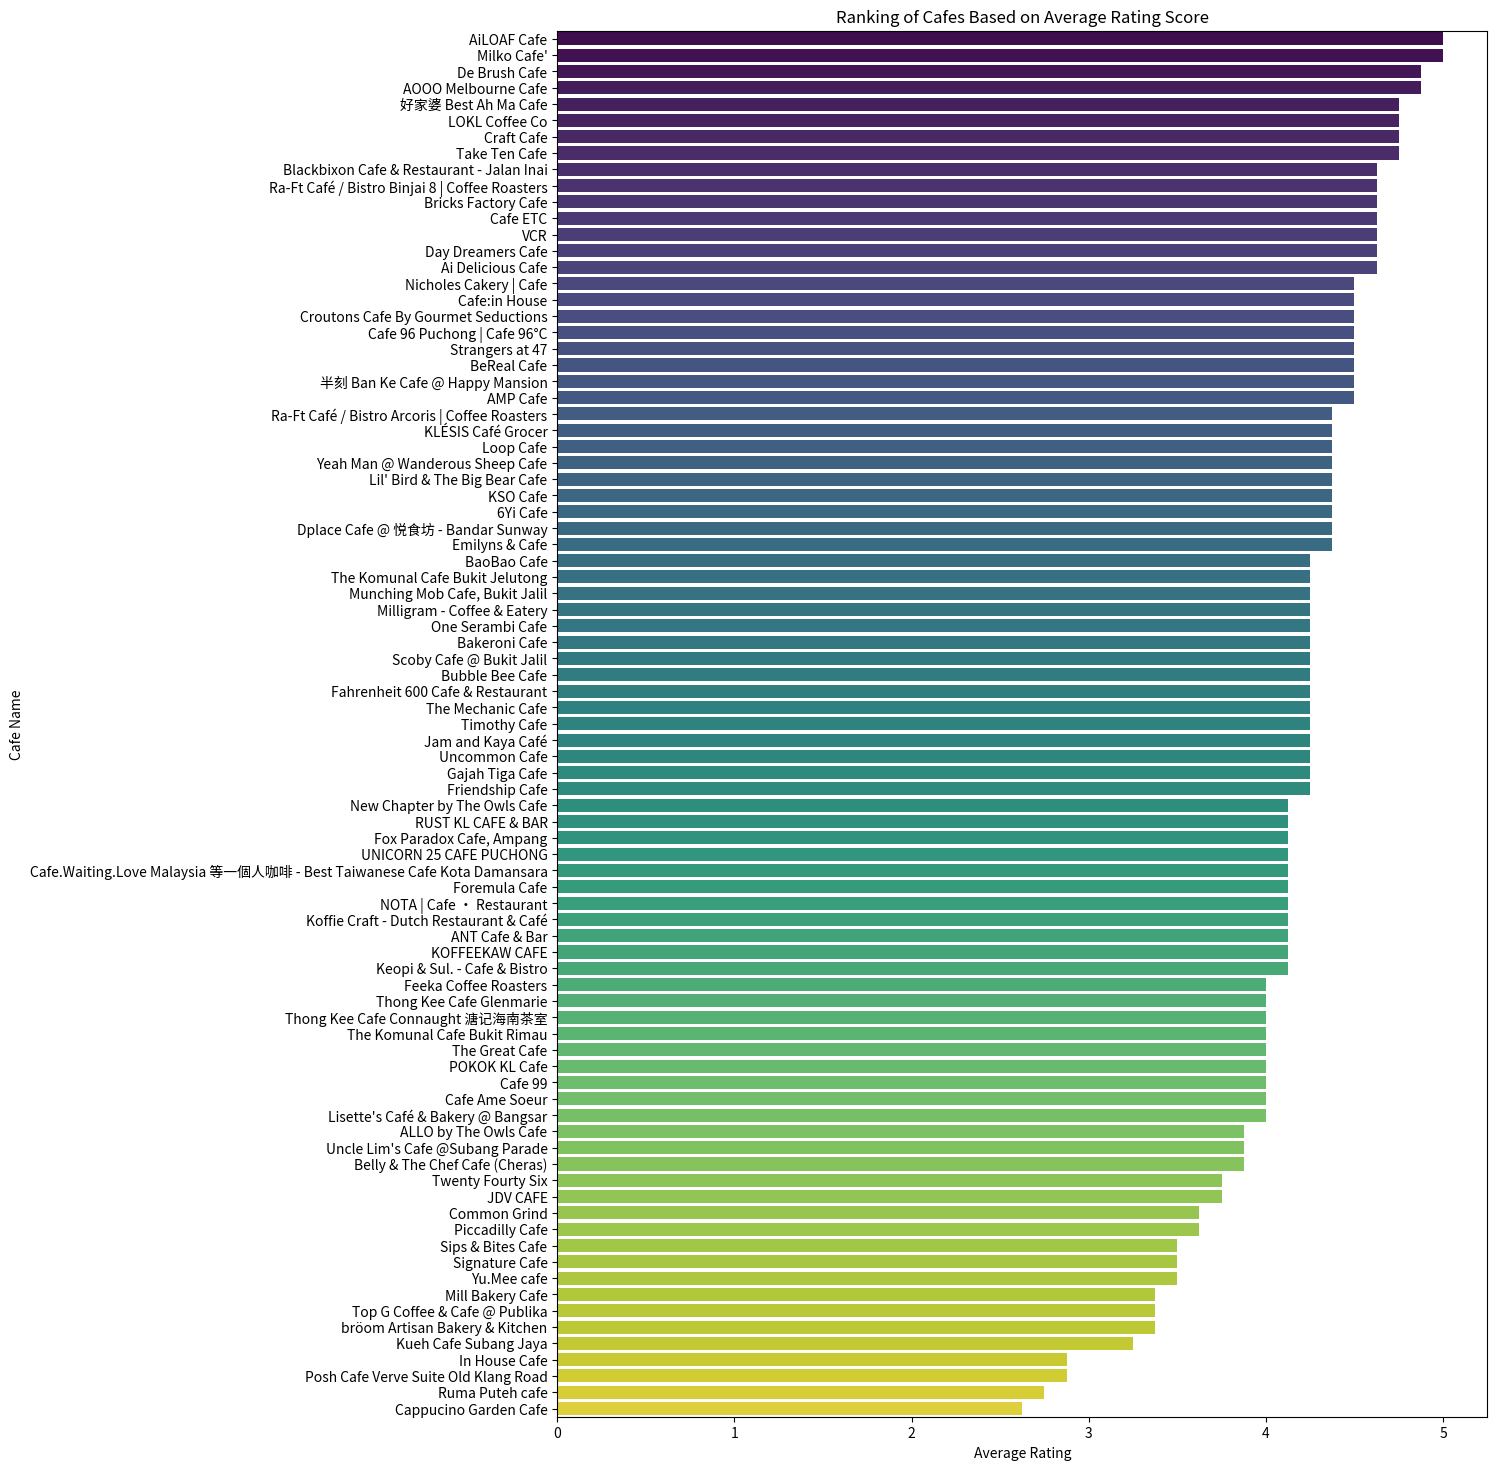

In [5]:
# Sort the DataFrame by 'average_rating' in descending order
grouped_df_sorted = grouped_df.sort_values(by='average_rating', ascending=False)

# Set the font family to one that supports a wide range of characters such as Chinese Characters
plt.rcParams['font.family'] = 'Noto Sans SC'
# Set the size of the plot
plt.figure(figsize=(12, 18))

# Create the bar plot
sns.barplot(x='average_rating', y='cafe_name',  hue="cafe_name",data=grouped_df_sorted, palette='viridis', legend=False)

# Add titles and labels
plt.title('Ranking of Cafes Based on Average Rating Score')
plt.xlabel('Average Rating')
plt.ylabel('Cafe Name')

# Show the plot
plt.show()

In [17]:
# Get the top cafes with average rating more than 4.5
top_cafes = grouped_df_sorted[grouped_df_sorted['average_rating'] >= 4.5]
print(len(top_cafes))
top_cafes

23


cafe_name  number_of_ratings  \
6                                      AiLOAF Cafe                  8   
47                                     Milko Cafe'                  8   
25                                   De Brush Cafe                  8   
4                              AOOO Melbourne Cafe                  8   
84                             好家婆 Best Ah Ma Cafe                  8   
43                                  LOKL Coffee Co                  8   
22                                      Craft Cafe                  8   
66                                   Take Ten Cafe                  8   
11       Blackbixon Cafe & Restaurant - Jalan Inai                  8   
60  Ra-Ft Café / Bistro Binjai 8 | Coffee Roasters                  8   
12                             Bricks Factory Cafe                  8   
17                                        Cafe ETC                  8   
79                                             VCR                  8   
24                               Day Dreamers Cafe                  8   
5                                Ai Delicious Cafe                  8   
53                          Nicholes Cakery | Cafe                  8   
19                                   Cafe:in House                  8   
23             Croutons Cafe By Gourmet Seductions                  8   
14                     Cafe 96 Puchong | Cafe 96°C                  8   
65                                 Strangers at 47                  8   
9                                      BeReal Cafe                  8   
83                  半刻 Ban Ke Cafe @ Happy Mansion                  8   
2                                         AMP Cafe                  8   

    average_rating  total_number_of_images earliest_date latest_date  
6            5.000                      35    2024-01-07  2024-05-24  
47           5.000                      27    2023-12-07  2024-05-31  
25           4.875                      23    2023-08-07  2024-05-07  
4            4.875                      47    2024-01-07  2024-05-07  
84           4.750                      46    2024-03-07  2024-05-31  
43           4.750                      32    2024-02-07  2024-05-31  
22           4.750                      46    2024-01-07  2024-05-31  
66           4.750                      41    2023-07-07  2024-05-31  
11           4.625                      53    2024-01-07  2024-05-31  
60           4.625                      32    2023-06-07  2024-06-02  
12           4.625                      13    2023-06-07  2024-06-01  
17           4.625                      30    2024-01-07  2024-05-24  
79           4.625                      29    2024-02-07  2024-05-24  
24           4.625                      57    2024-01-07  2024-05-07  
5            4.625                      40    2024-01-07  2024-05-07  
53           4.500                      35    2024-04-07  2024-06-03  
19           4.500                      20    2024-03-07  2024-06-02  
23           4.500                      40    2023-06-07  2024-04-07  
14           4.500                      69    2023-08-07  2024-06-02  
65           4.500                      48    2024-01-07  2024-06-02  
9            4.500                      40    2023-07-07  2024-05-24  
83           4.500                      57    2023-12-07  2024-05-24  
2            4.500                      47    2024-01-07  2024-05-24

Conclusion 1:
* Out of 85 of the cafes in the dataset, 23 of them are great
* This is because these 23 cafes have an average rating of 4.5 or more
* The two best cafes (tied at average rating of 5.0) are AiLOAF Cafe and Milko Cafe'

In [16]:
# Get the bottom cafes with average rating less than 3.5
bottom_cafes = grouped_df_sorted[grouped_df_sorted['average_rating'] <= 3.5]
print(len(bottom_cafes))
bottom_cafes

11


cafe_name  number_of_ratings  average_rating  \
64                     Sips & Bites Cafe                  8           3.500   
63                        Signature Cafe                  8           3.500   
81                           Yu.Mee cafe                  8           3.500   
48                      Mill Bakery Cafe                  8           3.375   
74         Top G Coffee & Cafe @ Publika                  8           3.375   
82        bröom Artisan Bakery & Kitchen                  8           3.375   
42                 Kueh Cafe Subang Jaya                  8           3.250   
34                         In House Cafe                  8           2.875   
57  Posh Cafe Verve Suite Old Klang Road                  8           2.875   
61                       Ruma Puteh cafe                  8           2.750   
20                 Cappucino Garden Cafe                  8           2.625   

    total_number_of_images earliest_date latest_date  
64                      38    2023-09-07  2024-05-07  
63                      47    2023-11-07  2024-05-31  
81                      18    2023-06-07  2024-05-31  
48                      67    2023-07-07  2024-04-07  
74                       7    2023-07-07  2024-05-17  
82                      53    2024-02-07  2024-05-31  
42                      48    2023-09-07  2024-04-07  
34                      20    2023-12-07  2024-05-07  
57                      31    2020-06-07  2024-02-07  
61                      54    2024-01-07  2024-06-01  
20                      21    2021-06-07  2024-05-31

Conclusion 2:
* Out of 85 of the cafes in the dataset, 1 of them are awful
* This is because these 11 cafes have an average rating of 3.5 or less
* The worst cafe is Cappucino Garden Cafe with an average rating of 2.625

## 2. How does a cafe get a good or bad rating?

In [20]:
def generate_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [39]:
from collections import Counter
import re
def generate_word_cloud_ignore_top_words(text, title, num_words):
    # Tokenize the text and count word frequencies
    words = re.findall(r'\w+', text.lower())
    word_counts = Counter(words)

    # Find the top 5 most common words
    top_5_words = [word for word, count in word_counts.most_common(num_words)]

    # Create a function to filter out the top 5 words
    def filter_top_words(word):
        return word not in top_5_words

    # Filter the text to exclude the top 5 words
    filtered_words = filter(filter_top_words, words)
    filtered_text = ' '.join(filtered_words)

    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(filtered_text)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [45]:
five_star_reviews_df = reviews_df[reviews_df['rating'] == 5]
four_star_reviews_df = reviews_df[reviews_df['rating'] == 4]
three_star_reviews_df = reviews_df[reviews_df['rating'] == 3]
two_star_reviews_df = reviews_df[reviews_df['rating'] == 2]
one_star_reviews_df = reviews_df[reviews_df['rating'] == 1]

# Print the count of reviews for each rating
print(f"Number of 5-star reviews: {len(five_star_reviews_df)}")
print(f"Number of 4-star reviews: {len(four_star_reviews_df)}")
print(f"Number of 3-star reviews: {len(three_star_reviews_df)}")
print(f"Number of 2-star reviews: {len(two_star_reviews_df)}")
print(f"Number of 1-star reviews: {len(one_star_reviews_df)}")

Number of 5-star reviews: 323
Number of 4-star reviews: 224
Number of 3-star reviews: 77
Number of 2-star reviews: 26
Number of 1-star reviews: 30


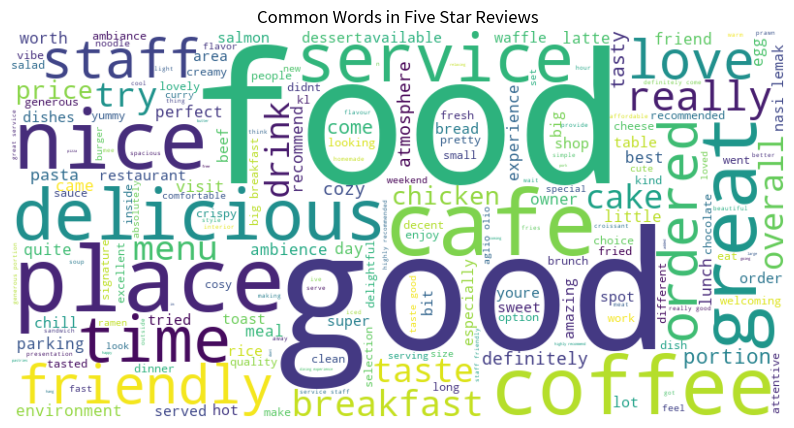

In [47]:
generate_word_cloud_ignore_top_words(' '.join(five_star_reviews_df["description_processed"]), 'Common Words in Five Star Reviews',0)

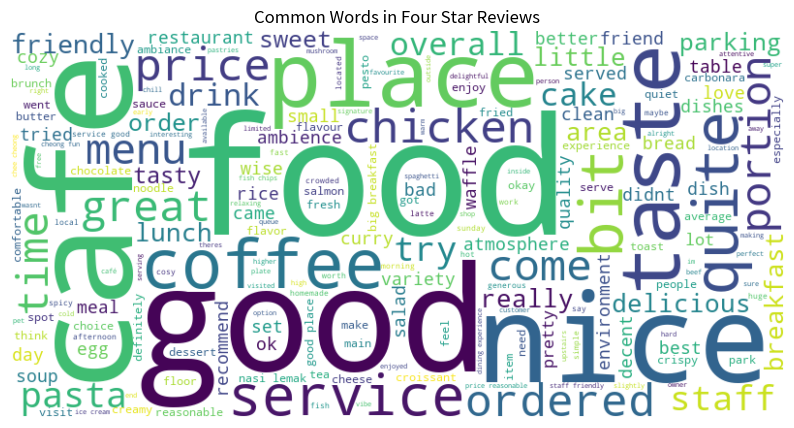

In [48]:
generate_word_cloud_ignore_top_words(' '.join(four_star_reviews_df["description_processed"]), 'Common Words in Four Star Reviews',0)

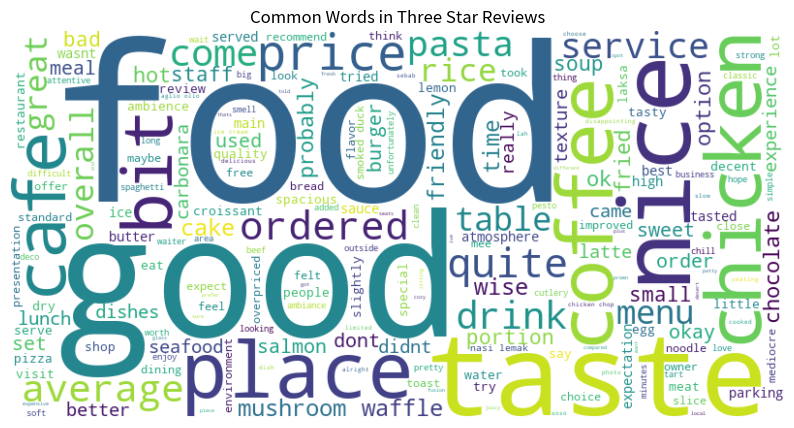

In [49]:
generate_word_cloud_ignore_top_words(' '.join(three_star_reviews_df["description_processed"]), 'Common Words in Three Star Reviews',0)

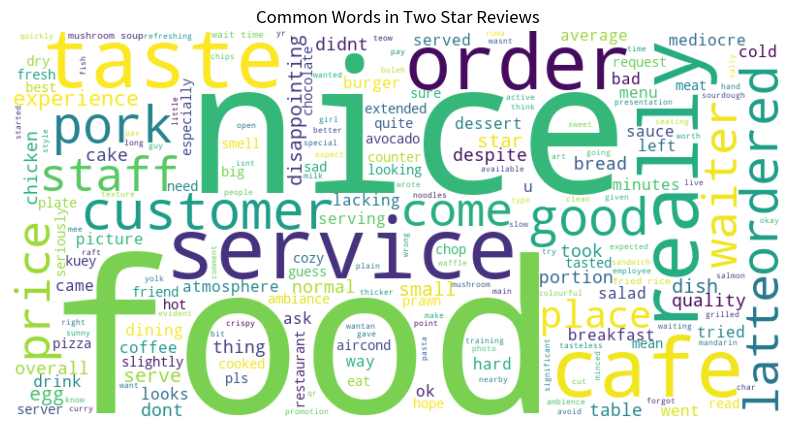

In [50]:
generate_word_cloud_ignore_top_words(' '.join(two_star_reviews_df["description_processed"]), 'Common Words in Two Star Reviews',0)

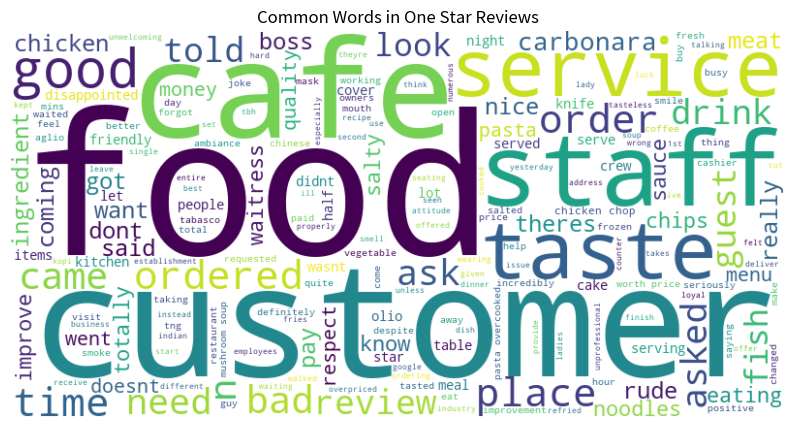

In [51]:
generate_word_cloud_ignore_top_words(' '.join(one_star_reviews_df["description_processed"]), 'Common Words in One Star Reviews',0)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


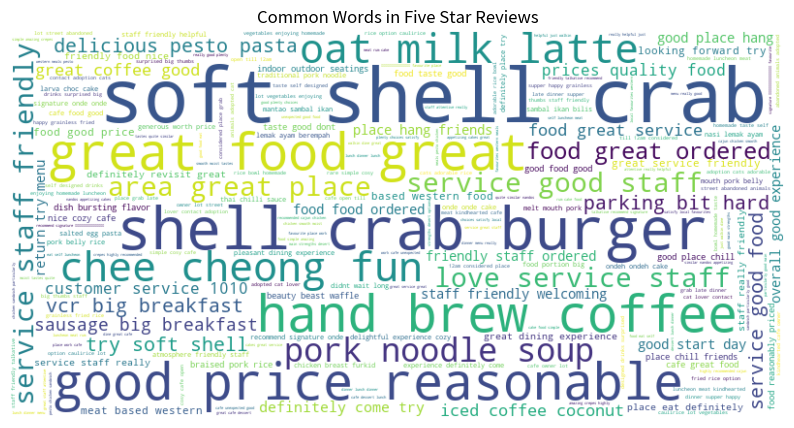

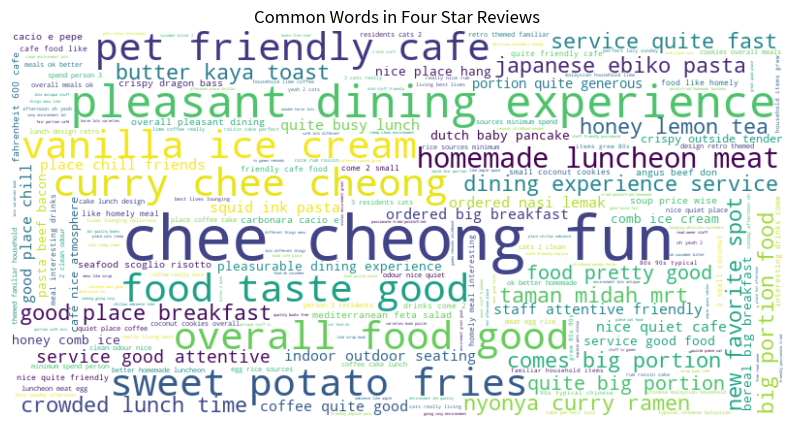

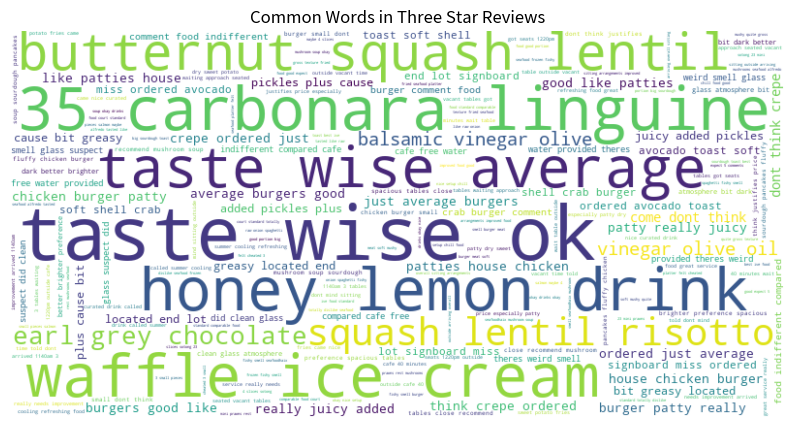

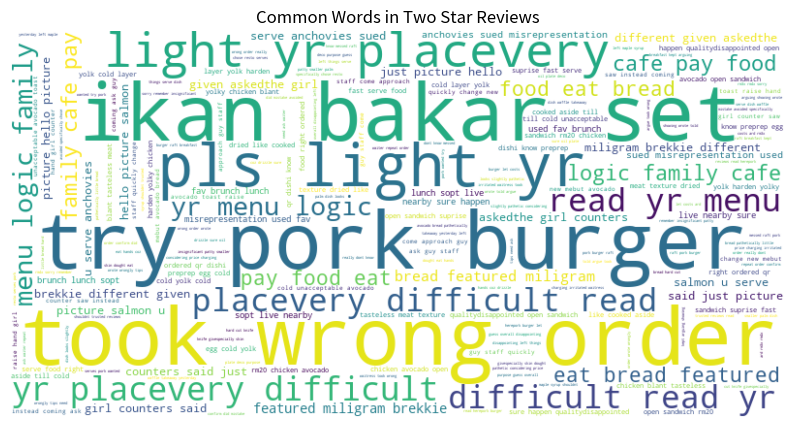

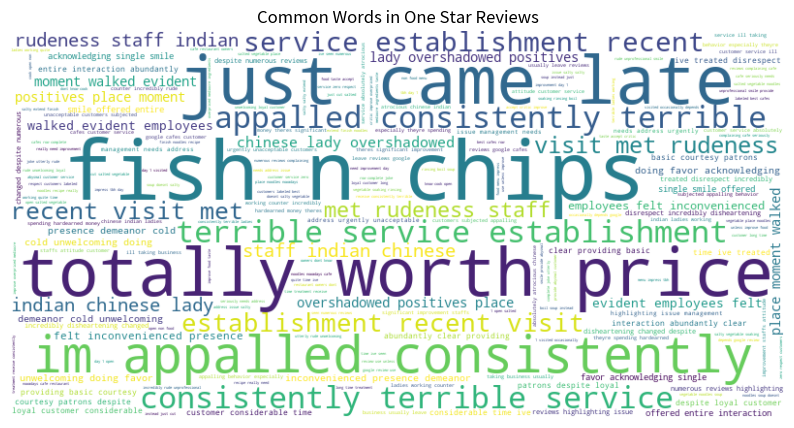

In [54]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import nltk
import re

# Ensure the necessary NLTK data packages are downloaded
nltk.download('punkt')

def generate_trigram_word_cloud(text, title):
    # Tokenize the text into words
    words = nltk.word_tokenize(text.lower())
    
    # Generate trigrams (phrases of 3 words)
    trigrams = list(nltk.trigrams(words))
    
    # Join each trigram into a single string
    trigram_strings = [' '.join(trigram) for trigram in trigrams]
    
    # Count the frequencies of each trigram
    trigram_counts = Counter(trigram_strings)
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(trigram_counts)
    
    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()
generate_trigram_word_cloud(' '.join(five_star_reviews_df["description_processed"]), 'Common Words in Five Star Reviews')
generate_trigram_word_cloud(' '.join(four_star_reviews_df["description_processed"]), 'Common Words in Four Star Reviews')
generate_trigram_word_cloud(' '.join(three_star_reviews_df["description_processed"]), 'Common Words in Three Star Reviews')
generate_trigram_word_cloud(' '.join(two_star_reviews_df["description_processed"]), 'Common Words in Two Star Reviews')
generate_trigram_word_cloud(' '.join(one_star_reviews_df["description_processed"]), 'Common Words in One Star Reviews')

## 3. How have relevant ratings changed across time?

## 4. Are people honest with their ratings?

## 5. How does a cafe get a better or worse sentiment?


## 6. What are the best and worst cafes in KL and Selangor are?